### Market index Prediction





In [59]:
### Keras and Tensorflow >2.0

In [60]:
import pandas as pd

In [61]:
df=pd.read_csv('STOCK_INDEX.csv')

In [62]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,5200.899902,5238.450195,5167.100098,5232.200195,5232.200195,0.0
1,2010-01-05,5277.149902,5288.350098,5242.399902,5277.899902,5277.899902,0.0
2,2010-01-06,5278.149902,5310.850098,5260.049805,5281.799805,5281.799805,0.0
3,2010-01-07,5281.799805,5302.549805,5244.750000,5263.100098,5263.100098,0.0
4,2010-01-08,5264.250000,5276.750000,5234.700195,5244.750000,5244.750000,0.0


In [63]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2689,2021-04-26,14449.45020,14557.50000,14421.29981,14485.00000,14485.00000,452700.0
2690,2021-04-27,14493.79981,14667.54981,14484.84961,14653.04981,14653.04981,451800.0
2691,2021-04-28,14710.50000,14890.25000,14694.95020,14864.54981,14864.54981,457000.0
2692,2021-04-29,14979.00000,15044.34961,14814.45020,14894.90039,14894.90039,517500.0
2693,2021-04-30,14747.34961,14855.45020,14601.70020,14631.09961,14631.09961,613900.0


In [64]:
df1=df.reset_index()['Close']

In [65]:
df1

0        5232.200195
1        5277.899902
2        5281.799805
3        5263.100098
4        5244.750000
            ...     
2689    14485.000000
2690    14653.049810
2691    14864.549810
2692    14894.900390
2693    14631.099610
Name: Close, Length: 2694, dtype: float64

In [66]:
df1= df1.dropna()
df1.info()

<class 'pandas.core.series.Series'>
Int64Index: 2667 entries, 0 to 2693
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


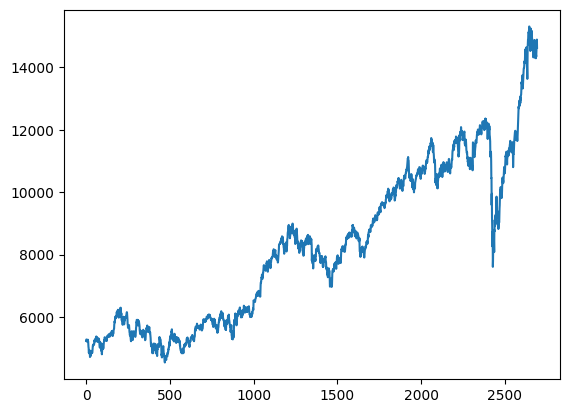

In [67]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [68]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [69]:
import numpy as np

In [70]:
df1

0        5232.200195
1        5277.899902
2        5281.799805
3        5263.100098
4        5244.750000
            ...     
2689    14485.000000
2690    14653.049810
2691    14864.549810
2692    14894.900390
2693    14631.099610
Name: Close, Length: 2667, dtype: float64

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [72]:
print(df1)

[[0.06387819]
 [0.06812123]
 [0.06848332]
 ...
 [0.95820525]
 [0.96102318]
 [0.93653028]]


In [73]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [74]:
training_size,test_size

(2133, 534)

In [75]:
train_data

array([[0.06387819],
       [0.06812123],
       [0.06848332],
       ...,
       [0.59222411],
       [0.5837519 ],
       [0.58545096]])

In [76]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [77]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [78]:
print(X_train.shape), print(y_train.shape)

(2082, 50)
(2082,)


(None, None)

In [79]:
print(X_test.shape), print(ytest.shape)

(483, 50)
(483,)


(None, None)

In [80]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [81]:
y_train =y_train.reshape(y_train.shape[0] , 1)
ytest = ytest.reshape(ytest.shape[0], 1)

In [82]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [83]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=32,verbose=1)

Epoch 1/100
66/66 [==============================] - 8s 29ms/step - loss: 0.0079 - val_loss: 0.0031
Epoch 2/100
66/66 [==============================] - 1s 11ms/step - loss: 4.0087e-04 - val_loss: 0.0031
Epoch 3/100
66/66 [==============================] - 1s 11ms/step - loss: 3.8575e-04 - val_loss: 0.0035
Epoch 4/100
66/66 [==============================] - 1s 12ms/step - loss: 3.5852e-04 - val_loss: 0.0036
Epoch 5/100
66/66 [==============================] - 1s 12ms/step - loss: 4.0427e-04 - val_loss: 0.0025
Epoch 6/100
66/66 [==============================] - 1s 12ms/step - loss: 3.2745e-04 - val_loss: 0.0021
Epoch 7/100
66/66 [==============================] - 1s 11ms/step - loss: 3.0767e-04 - val_loss: 0.0024
Epoch 8/100
66/66 [==============================] - 1s 12ms/step - loss: 2.8942e-04 - val_loss: 0.0026
Epoch 9/100
66/66 [==============================] - 1s 16ms/step - loss: 3.0947e-04 - val_loss: 0.0016
Epoch 10/100
66/66 [==============================] - 1s 17ms/step -

In [86]:
model.save('MODEL.h5')

In [87]:
import tensorflow as tf

In [88]:
tf.__version__

'2.12.0'

In [89]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 0s 6ms/step


In [90]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [91]:
##Transformback to original form
y_train=scaler.inverse_transform(y_train)
ytest=scaler.inverse_transform(ytest)

In [92]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

73.80862921782592

In [93]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

211.36103992894627

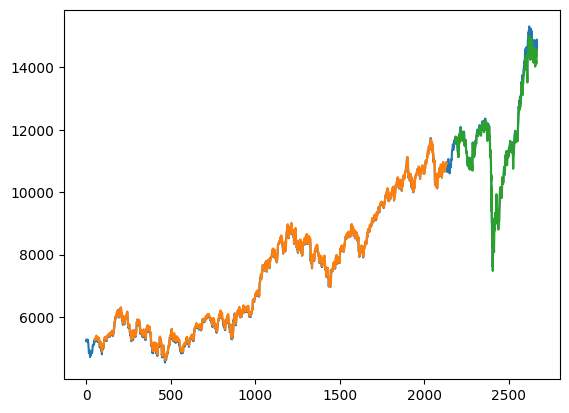

In [94]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [95]:
# from here begins for next n days

In [96]:
data=pd.read_csv('sample_input.csv')

In [97]:
data.info()
data.fillna(method='ffill', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       50 non-null     object 
 1   Open       48 non-null     float64
 2   High       48 non-null     float64
 3   Low        48 non-null     float64
 4   Close      48 non-null     float64
 5   Adj Close  48 non-null     float64
 6   Volume     48 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [98]:
data1=data.reset_index()['Close']
data1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [99]:
data1.info()

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
50 non-null     float64
dtypes: float64(1)
memory usage: 528.0 bytes


In [100]:
data1 = data1.interpolate(method='spline', order=3)
data1.fillna(method='ffill', inplace=True) # Fill missing values forward
data1.fillna(method='bfill', inplace=True) # Fill missing values backward
# data1=data1.ffill()

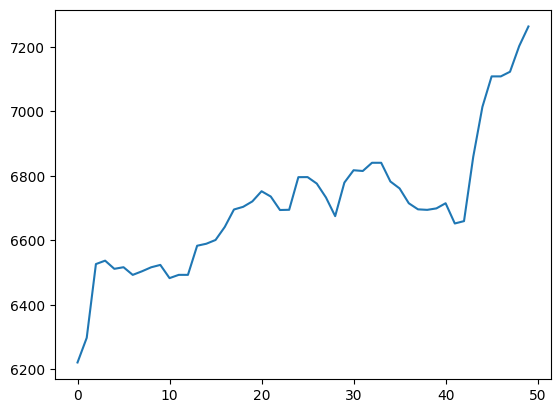

In [101]:
import matplotlib.pyplot as plt
plt.plot(data1)

In [102]:
len(data1)

50

In [103]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [104]:
# len(test dta)-50 in next line instead of 341

In [105]:
x_input=data1.reshape(1,-1)
x_input.shape


(1, 50)

In [106]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [107]:
temp_input

[0.0,
 0.07340948913703116,
 0.29286999445283346,
 0.30304186084476115,
 0.278715877266281,
 0.2835138830922306,
 0.26067556344253795,
 0.27132722945746046,
 0.2832739828009334,
 0.2903749383420253,
 0.2510795517906388,
 0.26077161664037085,
 0.26077161664037085,
 0.3474234147347959,
 0.35342092201723396,
 0.36460018155078266,
 0.40332018260711155,
 0.4552824916612339,
 0.4632474624954517,
 0.47941636788444786,
 0.509643804587931,
 0.49385864658369805,
 0.4537952979370168,
 0.4544667375895086,
 0.5515307696929277,
 0.5517224087628243,
 0.5324343322611922,
 0.4909798430881285,
 0.4355146145770066,
 0.5354091889545947,
 0.5721139335231111,
 0.5699070389250025,
 0.5943286074159451,
 0.5943286074159451,
 0.5386239468988956,
 0.5179925218473116,
 0.47385086824857314,
 0.45576229224382825,
 0.45422683729821145,
 0.45859330376296725,
 0.473898661184605,
 0.41368368806893496,
 0.42068905773796406,
 0.6116014283893643,
 0.7607716166403709,
 0.8514539267508221,
 0.8514539267508221,
 0.8652720894

In [108]:
# demonstrate prediction for next 2 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<2):

    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.94268537]
51
1 day input [0.07340949 0.29286999 0.30304186 0.27871588 0.28351388 0.26067556
 0.27132723 0.28327398 0.29037494 0.25107955 0.26077162 0.26077162
 0.34742341 0.35342092 0.36460018 0.40332018 0.45528249 0.46324746
 0.47941637 0.5096438  0.49385865 0.4537953  0.45446674 0.55153077
 0.55172241 0.53243433 0.49097984 0.43551461 0.53540919 0.57211393
 0.56990704 0.59432861 0.59432861 0.53862395 0.51799252 0.47385087
 0.45576229 0.45422684 0.4585933  0.47389866 0.41368369 0.42068906
 0.61160143 0.76077162 0.85145393 0.85145393 0.86527209 0.94189634
 1.         0.94268537]
1 day output [[0.89266866]]
[[0.9426853656768799], [0.8926686644554138]]


In [109]:
lst_output_2=scaler.inverse_transform(lst_output).tolist()
lst_output_2

[[7203.822246924584], [7151.699862088208]]

In [110]:
day_new=np.arange(1,51)
day_pred=np.arange(51,53)

In [111]:
import matplotlib.pyplot as plt

In [112]:
len(data1)

50

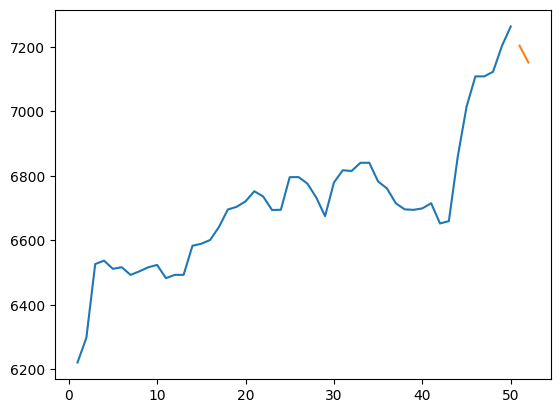

In [113]:
plt.plot(day_new,scaler.inverse_transform(data1))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

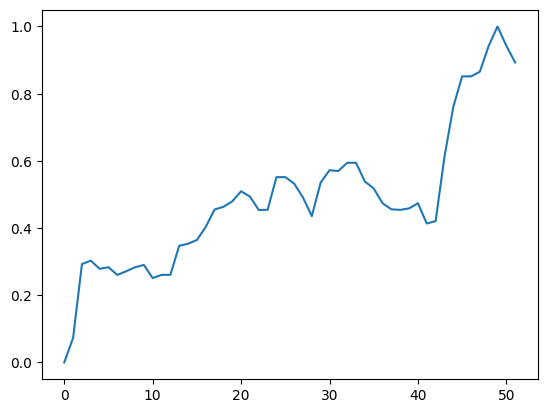

In [114]:
data3=data1.tolist()
data3.extend(lst_output)
plt.plot(data3)

In [115]:
data3=scaler.inverse_transform(data3).tolist()

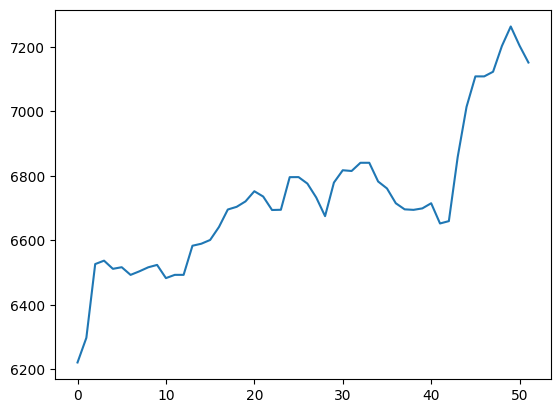

In [116]:
plt.plot(data3)